<div style="display: flex; flex-direction: column; align-items: center; font-family: Arial, sans-serif; line-height: 1.6;">

  <h1 style="margin-bottom: 0;">Linguistic Feature Analysis and Sequence Tagging using POS and NER Integration</h1>
</div>


# **STEP 1: Library Installation and Imports**

In [6]:
 !pip install nltk wordcloud
 import pandas as pd
 import numpy as np
 import nltk
 import re
 import matplotlib.pyplot as plt
 from nltk.corpus import stopwords
 from nltk.stem import WordNetLemmatizer
 from nltk import pos_tag, word_tokenize, ne_chunk
 from wordcloud import WordCloud
 from collections import Counter

# **STEP 2: NLTK Resource Downloads**

In [7]:
 nltk.download('punkt_tab')
 nltk.download('stopwords')
 nltk.download('averaged_perceptron_tagger_eng')
 nltk.download('wordnet')
 nltk.download('words')
 nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

# **STEP 3: Load Dataset and Select 'body' Column**

In [8]:
 df = pd.read_csv("Amazon Cell Phone reviews.csv")
 df = df.dropna(subset=['body'])
 reviews = df['body'].head(100).tolist()

# **STEP 4: Data Preprocessing (Cleaning + Lemmatization):**

In [9]:
 stop_words = set(stopwords.words('english'))
 lemmatizer = WordNetLemmatizer()
 cleaned_reviews = []
 for text in reviews:
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    cleaned_reviews.append(" ".join(tokens))

# **STEP 5:  POS Tagging and Sentence Filtering for Analysis and Frequency Analysis**


In [26]:
from collections import Counter
from nltk import word_tokenize, pos_tag

# Initialize variables
pos_tags = []
selected_sentences = []

for review in cleaned_reviews:
    tokens = word_tokenize(review)
    tags = pos_tag(tokens)

    # Accumulate POS tags
    pos_tags.extend([tag for _, tag in tags])

    # Select sentences containing at least one noun or verb
    if any(tag.startswith(('NN', 'VB')) for _, tag in tags):
        selected_sentences.append(review)

# Count most common POS tags
pos_counts = Counter(pos_tags)
most_common_tags = pos_counts.most_common(10)

print(pos_counts)

print(most_common_tags)




Counter({'NN': 2922, 'JJ': 1256, 'RB': 539, 'VBD': 319, 'VBG': 246, 'VB': 224, 'VBP': 213, 'VBN': 154, 'IN': 137, 'NNS': 97, 'CD': 87, 'MD': 76, 'VBZ': 44, 'DT': 29, 'JJR': 28, 'JJS': 22, 'RBR': 11, 'FW': 9, 'CC': 8, 'PRP': 7, 'RP': 7, 'EX': 4, 'WDT': 3, 'NNP': 2, 'WP$': 1, 'WRB': 1, 'WP': 1})
[('NN', 2922), ('JJ', 1256), ('RB', 539), ('VBD', 319), ('VBG', 246), ('VB', 224), ('VBP', 213), ('VBN', 154), ('IN', 137), ('NNS', 97)]


## **STEP 6: POS Tagging and Frequency Analysis**

In [27]:
# Define which POS tags to extract sentences for
target_tags = {'NN', 'NNS', 'NNP', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

print("\nSentences containing target POS tags:\n")

for i, review in enumerate(cleaned_reviews):
    tokens = word_tokenize(review)
    tags = pos_tag(tokens)

    # Check if any token has a POS tag in the target set
    if any(tag in target_tags for _, tag in tags):
        matching_tags = set(tag for _, tag in tags if tag in target_tags)
        print(f"Review {i+1} (matched tags: {', '.join(sorted(matching_tags))}):")
        print(review)
        print("-" * 80)



Sentences containing target POS tags:

Review 1 (matched tags: NN, NNS, VB, VBD, VBG, VBN, VBP, VBZ):
samsung awhile absolute doo doo read review detect rage stupid thing finally died used nokia phone bought garage sale wonder sold cheap bad hate menu take forever get want scroll endlessly usually phone numbered category u simply press get want go pain put silent vibrate youre class ring turn immediately there fast way silence damn thing always remember put silent learned hard way true case mission get break ur nail process also youll damage case time u try reason phone started giving problem succeed opening button could bit bigger vibration could stronger good reception shabby using elevator remarkable feat considering old phone would lose service simply putting pocket compared old samsung phone work quite well ring tone loud enough hear phone actually charge quickly great battery life doesnt heat like potatoe oven either long phone convos nice bright large screen cute way customize 

# **STEP 7:  Visualization**

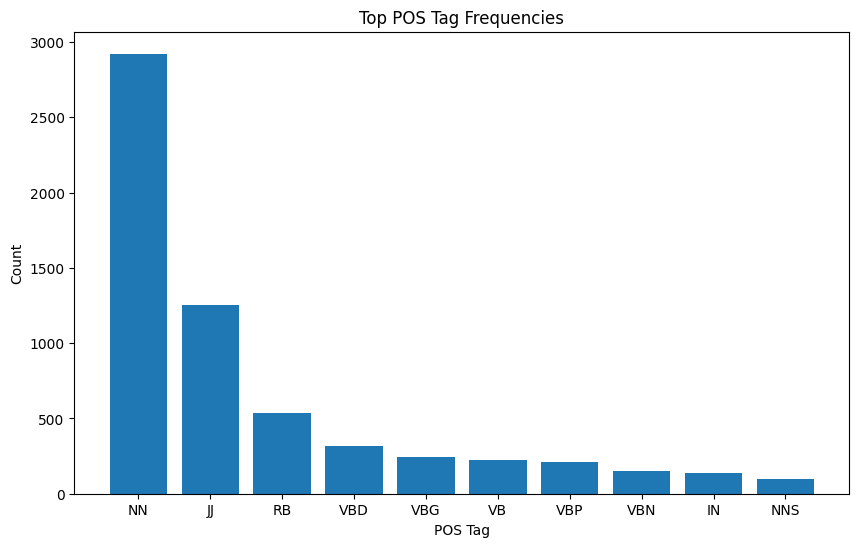

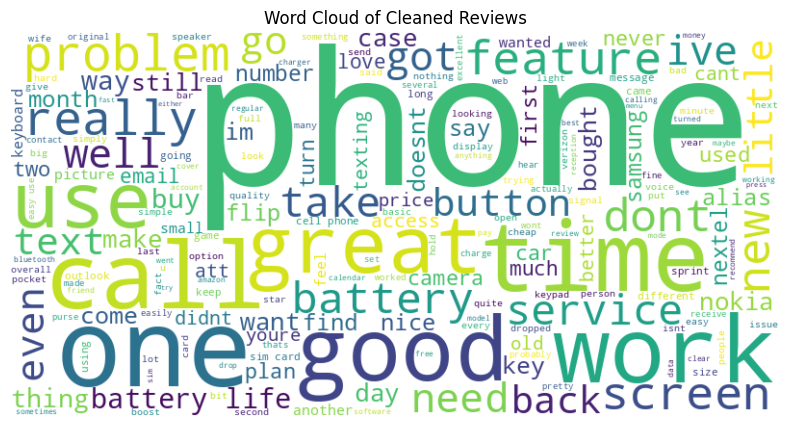

In [11]:
plt.figure(figsize=(10,6))
plt.bar(*zip(*most_common_tags))
plt.title('Top POS Tag Frequencies')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.show()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(cleaned_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.show()

# **STEP 8:  HMM POS Tagging (First 4 Reviews):**

In [12]:
hmm_sentences = [word_tokenize(review) for review in cleaned_reviews[:4]]
hmm_tags = [pos_tag(sent) for sent in hmm_sentences]
for i, tagged in enumerate(hmm_tags):
    print(f"\nReview {i+1} POS Tags:")
    print(tagged)


Review 1 POS Tags:
[('samsung', 'NN'), ('awhile', 'IN'), ('absolute', 'JJ'), ('doo', 'NN'), ('doo', 'NN'), ('read', 'VBP'), ('review', 'NN'), ('detect', 'JJ'), ('rage', 'NN'), ('stupid', 'JJ'), ('thing', 'NN'), ('finally', 'RB'), ('died', 'VBD'), ('used', 'VBN'), ('nokia', 'RB'), ('phone', 'NN'), ('bought', 'VBD'), ('garage', 'NN'), ('sale', 'NN'), ('wonder', 'NN'), ('sold', 'VBD'), ('cheap', 'JJ'), ('bad', 'JJ'), ('hate', 'NN'), ('menu', 'NNS'), ('take', 'VBP'), ('forever', 'RB'), ('get', 'VB'), ('want', 'JJ'), ('scroll', 'NN'), ('endlessly', 'RB'), ('usually', 'RB'), ('phone', 'NN'), ('numbered', 'JJ'), ('category', 'NN'), ('u', 'JJ'), ('simply', 'RB'), ('press', 'JJ'), ('get', 'NN'), ('want', 'VBP'), ('go', 'VB'), ('pain', 'NN'), ('put', 'VBD'), ('silent', 'JJ'), ('vibrate', 'NN'), ('youre', 'NN'), ('class', 'NN'), ('ring', 'VBG'), ('turn', 'VBP'), ('immediately', 'RB'), ('there', 'EX'), ('fast', 'JJ'), ('way', 'NN'), ('silence', 'NN'), ('damn', 'JJ'), ('thing', 'NN'), ('always', '

# **STEP 9:  POS and NER Integration**

In [13]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree

sample_texts = cleaned_reviews[:3]

for i, text in enumerate(sample_texts):
    print(f"\n--- Sentence {i+1} ---")
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    chunked = ne_chunk(pos_tags)

    for chunk in chunked:
        if isinstance(chunk, Tree):
            entity = " ".join(c[0] for c in chunk)
            label = chunk.label()
            print(f"{entity:<20} [NER: {label}]")
        else:
            word, tag = chunk
            print(f"{word:<20} [POS: {tag}]")



--- Sentence 1 ---
samsung              [POS: NN]
awhile               [POS: IN]
absolute             [POS: JJ]
doo                  [POS: NN]
doo                  [POS: NN]
read                 [POS: VBP]
review               [POS: NN]
detect               [POS: JJ]
rage                 [POS: NN]
stupid               [POS: JJ]
thing                [POS: NN]
finally              [POS: RB]
died                 [POS: VBD]
used                 [POS: VBN]
nokia                [POS: RB]
phone                [POS: NN]
bought               [POS: VBD]
garage               [POS: NN]
sale                 [POS: NN]
wonder               [POS: NN]
sold                 [POS: VBD]
cheap                [POS: JJ]
bad                  [POS: JJ]
hate                 [POS: NN]
menu                 [POS: NNS]
take                 [POS: VBP]
forever              [POS: RB]
get                  [POS: VB]
want                 [POS: JJ]
scroll               [POS: NN]
endlessly            [POS: RB]
usually     

In [14]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


This script integrates spaCy’s Named Entity Recognition (NER) with NLTK’s Part-of-Speech (POS) tagging to analyze the alignment between them. It also enhances NER accuracy by introducing custom rules via EntityRuler.

In [15]:
import spacy
from spacy.pipeline import EntityRuler

# Load spaCy base model
nlp = spacy.load("en_core_web_sm")

# Add EntityRuler before the default NER
ruler = nlp.add_pipe("entity_ruler", before="ner")

# Define brand, model, and carrier patterns
patterns = [
    {"label": "ORG", "pattern": "Samsung"},
    {"label": "ORG", "pattern": "Nokia"},
    {"label": "ORG", "pattern": "Sprint"},
    {"label": "ORG", "pattern": "AT&T"},
    {"label": "ORG", "pattern": "T-Mobile"},
    {"label": "PRODUCT", "pattern": "Nokia 3310"},
    {"label": "PRODUCT", "pattern": [{"LOWER": "iphone"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "galaxy"}, {"IS_ALPHA": True, "OP": "?"}]}
]

ruler.add_patterns(patterns)


In [16]:
text = reviews[10]  # Named Entity Recognition of a sample review from the given dataset
doc = nlp(text)

for ent in doc.ents:
    print(f"{ent.text:<25} → {ent.label_}")


over a year               → DATE
Nokia                     → ORG
two                       → CARDINAL
three                     → CARDINAL
the average day           → DATE
several days              → DATE
Samsung                   → ORG
a few months              → DATE
Drat                      → PERSON


# **POS and NER Integration**

In [17]:
import spacy
from spacy.pipeline import EntityRuler
import pandas as pd
from nltk import word_tokenize, pos_tag
from IPython.display import display, HTML

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add EntityRuler BEFORE the built-in NER
ruler = nlp.add_pipe("entity_ruler", before="ner")

# Define brand, model, and carrier patterns
patterns = [
    {"label": "ORG", "pattern": "Samsung"},
    {"label": "ORG", "pattern": "Nokia"},
    {"label": "ORG", "pattern": "Sprint"},
    {"label": "ORG", "pattern": "AT&T"},
    {"label": "ORG", "pattern": "T-Mobile"},
    {"label": "PRODUCT", "pattern": "Nokia 3310"},
    {"label": "PRODUCT", "pattern": [{"LOWER": "iphone"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "galaxy"}, {"IS_ALPHA": True, "OP": "?"}]}
]
ruler.add_patterns(patterns)

# Select first 10 reviews from dataset
sample_reviews = [reviews[i] for i in range(10)]

rows = []

for idx, text in enumerate(sample_reviews):
    doc = nlp(text)
    pos_tags = dict(pos_tag(word_tokenize(text)))

    for token in doc:
        pos = pos_tags.get(token.text, "-")
        ner = token.ent_type_ if token.ent_type_ else "-"

        relation = (
            "Complementary" if pos in ["NN", "NNP"] and ner in ["ORG", "PRODUCT", "GPE", "EVENT", "PERSON"] else
            "Contradictory" if ner != "-" and pos not in ["NN", "NNP", "JJ"] else
            "-"
        )

        rows.append({
            "Review #": idx + 1,
            "Token": token.text,
            "POS": pos,
            "NER": ner,
            "POS ↔ NER": relation
        })

# Build and display the table
df = pd.DataFrame(rows)
styled = df.style.set_caption("📘 POS + NER Alignment (with EntityRuler Patterns)")\
    .applymap(lambda x: "color: green" if x == "Complementary" else
                        "color: red" if x == "Contradictory" else "", subset=["POS ↔ NER"])\
    .set_properties(**{"border": "1px solid #ccc", "text-align": "left"})

display(HTML(styled.to_html(index=False)))


/tmp/ipython-input-17-1026547691.py:56: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: "color: green" if x == "Complementary" else


,Review #,Token,POS,NER,POS ↔ NER
0,1,I,PRP,-,-
1,1,had,VBD,-,-
2,1,the,DT,-,-
3,1,Samsung,NNP,ORG,Complementary
4,1,A600,NNP,-,-
5,1,for,IN,-,-
6,1,awhile,NN,-,-
7,1,which,WDT,-,-
8,1,is,VBZ,-,-
9,1,absolute,JJ,-,-


<div style="font-family: Arial, sans-serif; line-height: 1.6;">
  <h3> POS and NER Interactions: Complementarity & Contradiction</h3>

  <h4 style="color: green;"> Complementary Examples:</h4>
  <ul>
    <li><strong>Samsung</strong> &rarr; POS: NNP, NER: ORG</li>
    <li><strong>Nokia</strong> &rarr; POS: NNP, NER: ORG</li>
  </ul>
  <p>These examples show a <em>perfect synergy</em> between POS and NER: both systems agree that these are proper nouns (POS: NNP) and recognized organizations (NER: ORG). This reinforces confidence in the label's correctness and is especially useful in entity-centric tasks like brand recognition or opinion mining.</p>
  <h4 style="color: red;"> Contradictory Example:</h4>
  <ul>
    <li><strong>1</strong> &rarr; POS: CD (cardinal digit), NER: MONEY</li>
  </ul>
  <p>Here, the model tags the number <strong>1</strong> as a MONEY entity, but there’s no associated currency unit (like <code>$</code> or “dollars”) directly linked in the NER span. While the POS correctly recognizes it as a digit, NER mistakenly elevates its semantic role.</p>

  <p><strong>Why this matters:</strong> It can lead to misleading extractions in financial analysis or downstream reporting.</p>

  <h4 style="color: #1d3557;"> How This Relationship Improves Text Analysis</h4>
  <table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; background-color: #fafafa;">
    <thead style="background-color: #e0e0e0;">
      <tr>
        <th>Interaction</th>
        <th>Application Benefit</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Complementary (NNP + ORG)</td>
        <td>High-confidence tagging for brand names, ideal for sentiment analysis or entity linking.</td>
      </tr>
      <tr>
        <td>Contradictory (e.g. CD + MONEY)</td>
        <td>Red flags inconsistent model logic and allows for error-handling or rule-based correction.</td>
      </tr>
      <tr>
        <td>Cross-checking POS &harr; NER</td>
        <td>Enables hybrid pipelines that validate NER predictions using syntactic clues from POS.</td>
      </tr>
    </tbody>
  </table>
</div>
